test_names  34  --  ['000.png', '007.png', '012.png', '013.png', '015.png']
Testing:
load path is  f:\chuniliu\skeaw-experiments\skeaw_code\model\parameters_new_3090\cv_1_snemi3d_minValVI_unet_margin\best_model_state.pth


c:\Users\liuchuni\anaconda3\envs\chuni_env\lib\site-packages\skimage\util\dtype.py:550: UserWarning: Downcasting int64 to uint8 without scaling because max value 1 fits in uint8
  return _convert(image, np.uint8, force_copy)


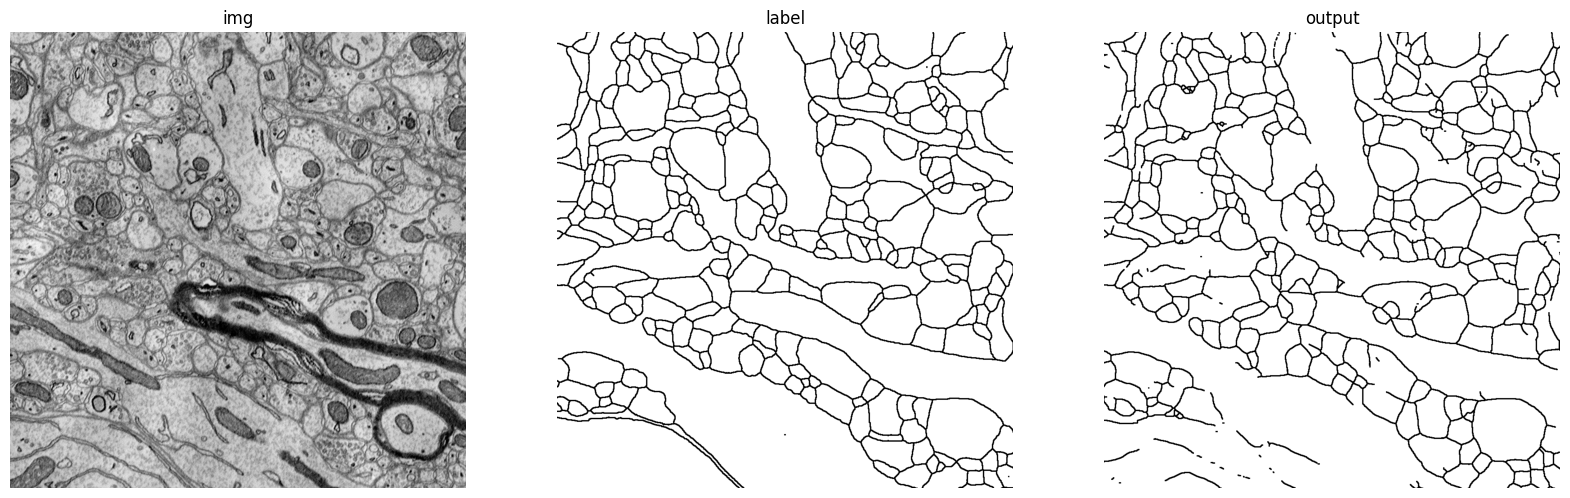

Experiment_name: cv_1_snemi3d_minValVI_unet_margin
Total Evaluation:
me:0.7634 se:0.0997 vi:0.8631 0.3900 0.5391
test_names  34  --  ['000.png', '007.png', '012.png', '013.png', '015.png']
Testing:
load path is  f:\chuniliu\skeaw-experiments\skeaw_code\model\parameters_new_3090\cv_1_snemi3d_minValVI_unet_warp_step20\best_model_state.pth


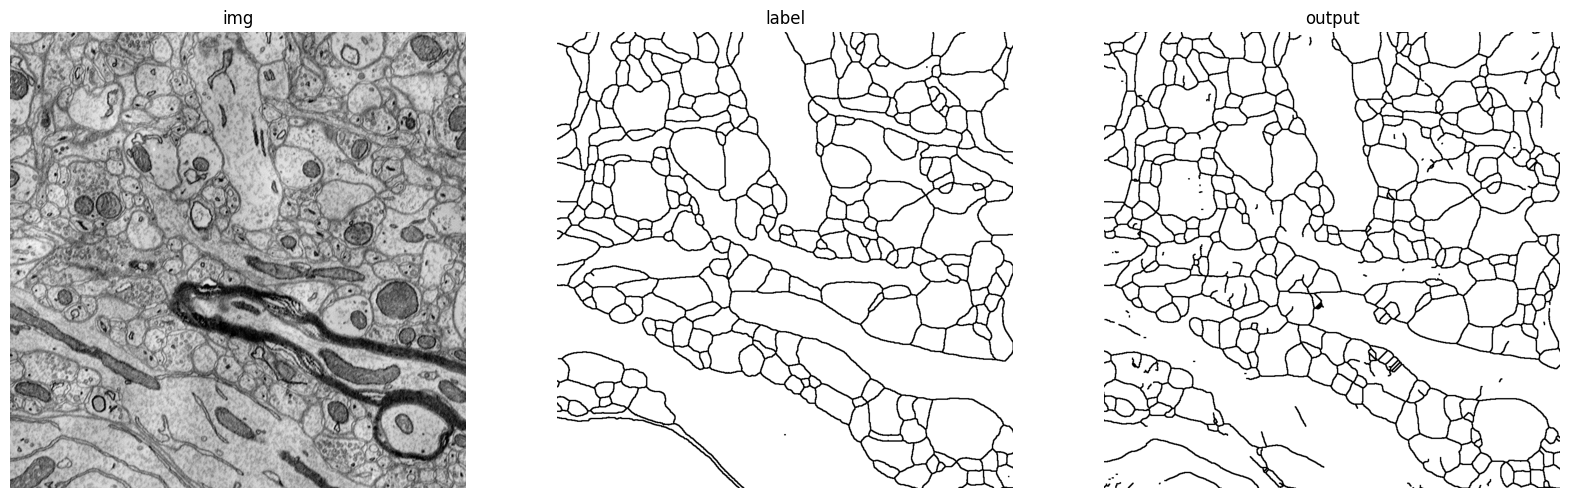

Experiment_name: cv_1_snemi3d_minValVI_unet_warp_step20
Total Evaluation:
me:0.1913 se:0.2003 vi:0.3916 0.4403 0.6214
test_names  33  --  ['002.png', '004.png', '005.png', '010.png', '014.png']
Testing:
load path is  f:\chuniliu\skeaw-experiments\skeaw_code\model\parameters_new_3090\cv_2_snemi3d_minValVI_unet_margin\best_model_state.pth


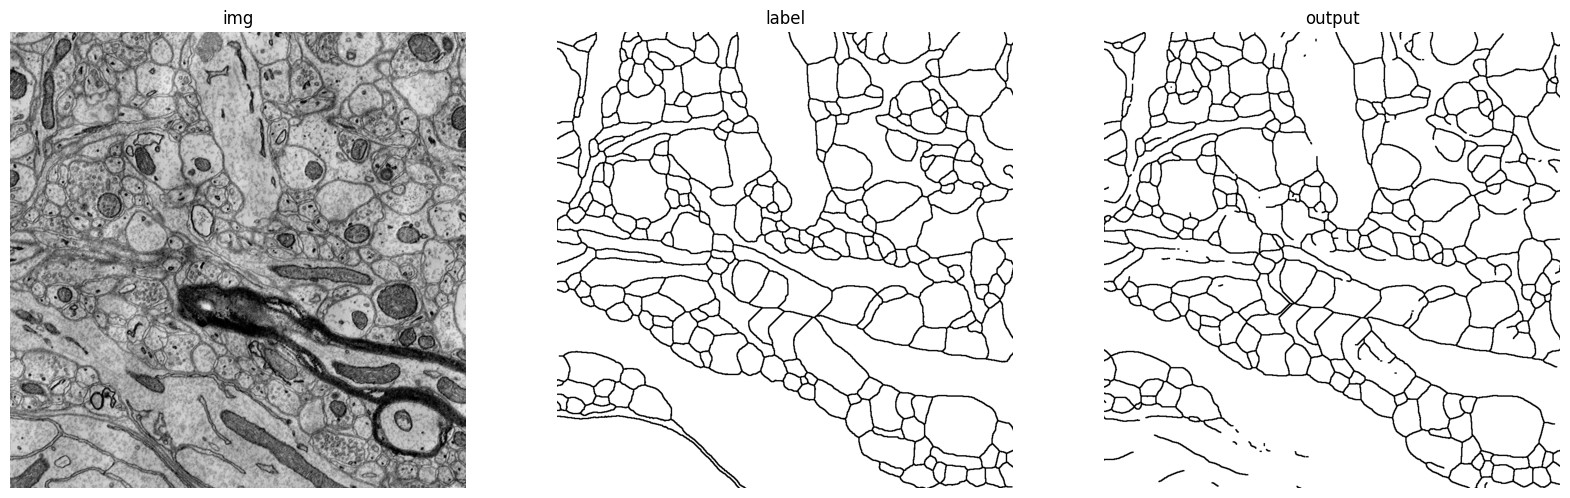

Experiment_name: cv_2_snemi3d_minValVI_unet_margin
Total Evaluation:
me:0.5136 se:0.1083 vi:0.6219 0.4314 0.5997
test_names  33  --  ['002.png', '004.png', '005.png', '010.png', '014.png']
Testing:
load path is  f:\chuniliu\skeaw-experiments\skeaw_code\model\parameters_new_3090\cv_2_snemi3d_minValVI_unet_warp_step20\best_model_state.pth


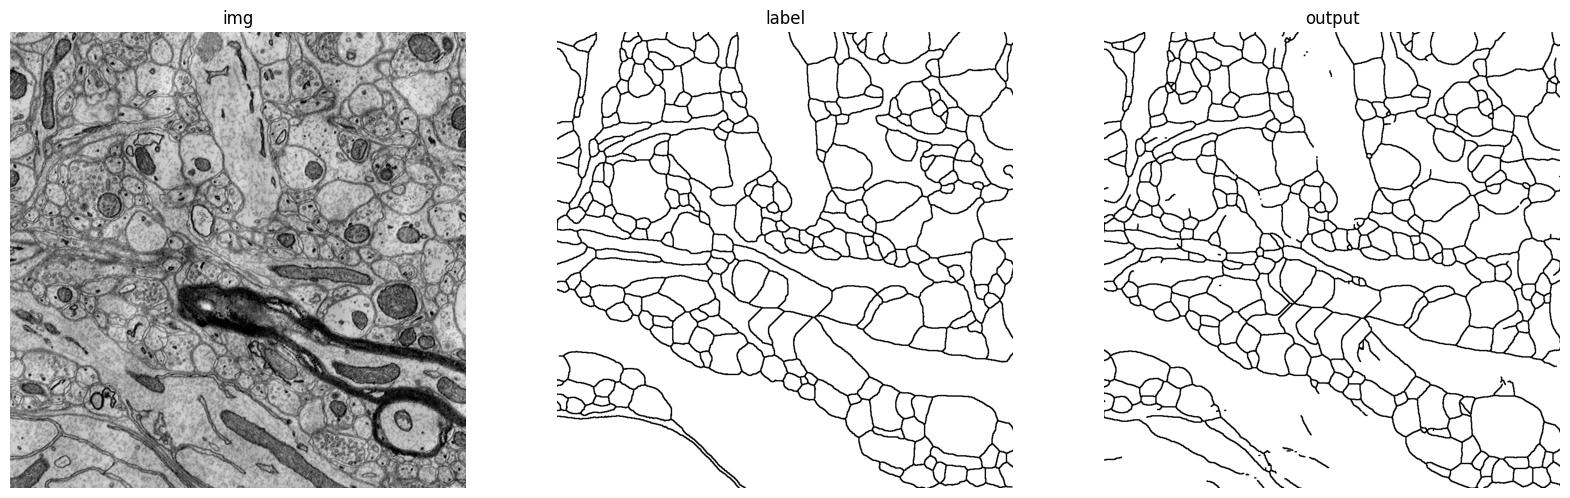

Experiment_name: cv_2_snemi3d_minValVI_unet_warp_step20
Total Evaluation:
me:0.3411 se:0.1636 vi:0.5046 0.4289 0.6208
test_names  33  --  ['001.png', '003.png', '006.png', '008.png', '009.png']
Testing:
load path is  f:\chuniliu\skeaw-experiments\skeaw_code\model\parameters_new_3090\cv_3_snemi3d_minValVI_unet_margin\best_model_state.pth


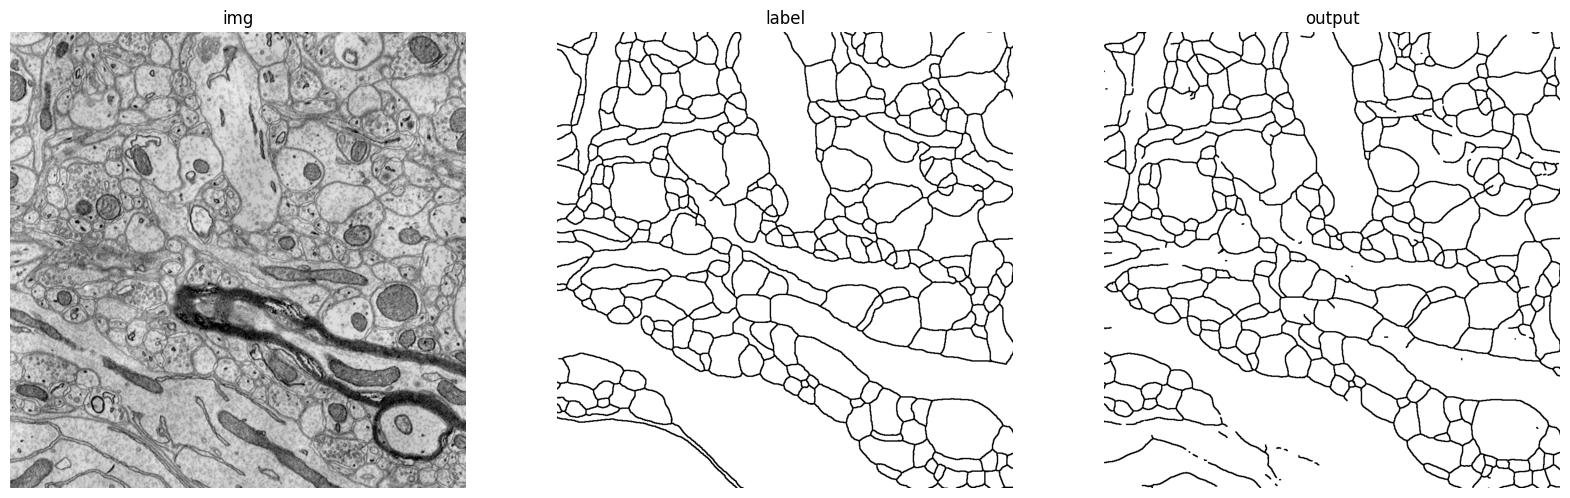

Experiment_name: cv_3_snemi3d_minValVI_unet_margin
Total Evaluation:
me:0.6280 se:0.1158 vi:0.7438 0.4138 0.5669
test_names  33  --  ['001.png', '003.png', '006.png', '008.png', '009.png']
Testing:
load path is  f:\chuniliu\skeaw-experiments\skeaw_code\model\parameters_new_3090\cv_3_snemi3d_minValVI_unet_warp_step20\best_model_state.pth


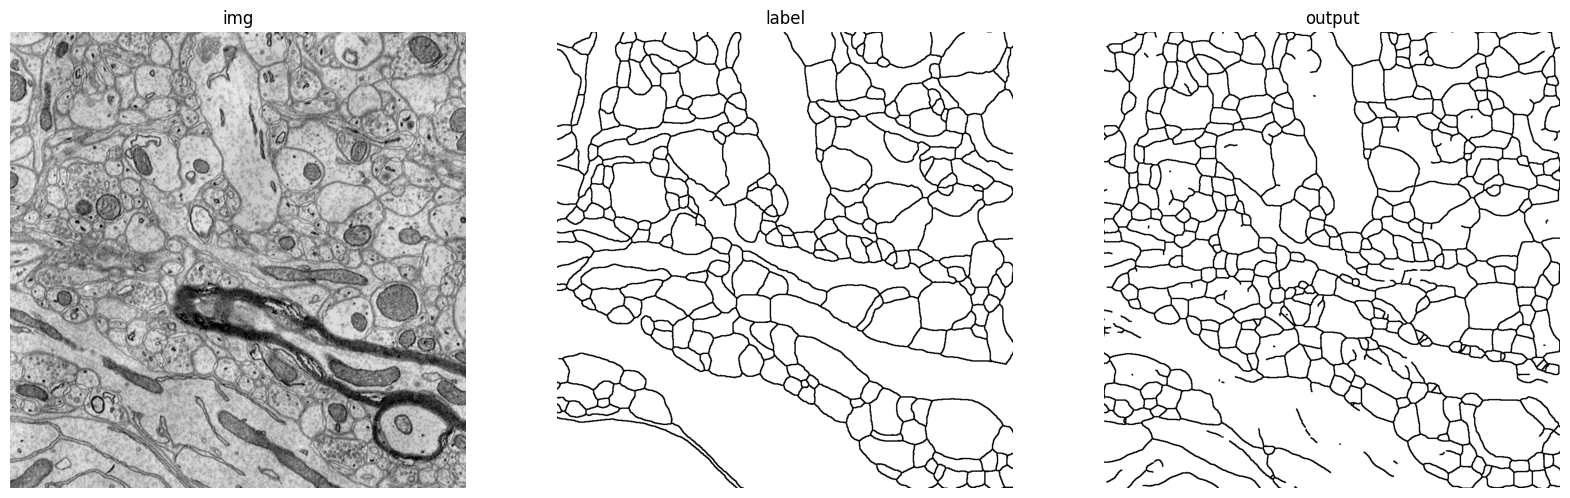

Experiment_name: cv_3_snemi3d_minValVI_unet_warp_step20
Total Evaluation:
me:0.2560 se:0.3454 vi:0.6014 0.3758 0.5690
cv_1_snemi3d_minValVI_unet_margin
me:0.7634 se:0.0997 vi:0.8631 mAp 0.3900 ari 0.5391
cv_1_snemi3d_minValVI_unet_warp_step20
me:0.1913 se:0.2003 vi:0.3916 mAp 0.4403 ari 0.6214
cv_2_snemi3d_minValVI_unet_margin
me:0.5136 se:0.1083 vi:0.6219 mAp 0.4314 ari 0.5997
cv_2_snemi3d_minValVI_unet_warp_step20
me:0.3411 se:0.1636 vi:0.5046 mAp 0.4289 ari 0.6208
cv_3_snemi3d_minValVI_unet_margin
me:0.6280 se:0.1158 vi:0.7438 mAp 0.4138 ari 0.5669
cv_3_snemi3d_minValVI_unet_warp_step20
me:0.2560 se:0.3454 vi:0.6014 mAp 0.3758 ari 0.5690
cv_3_fold_snemi3d_unet_margin
            margin    warp_step20
me   0.6350 ± 0.10  0.2628 ± 0.06
se   0.1079 ± 0.01  0.2364 ± 0.08
vi   0.7429 ± 0.10  0.4992 ± 0.09
mAp  0.4117 ± 0.02  0.4150 ± 0.03
ari  0.5686 ± 0.02  0.6038 ± 0.02
done! export to  f:\chuniliu\skeaw-experiments\skeaw_code\statistic\cv_3_fold_snemi3d_unet_margin.xlsx


In [1]:
import os
from pathlib import Path
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

import cv2, time
import random
import skimage
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as tr
from sklearn.model_selection import KFold
import pandas as pd

from model.metric import metrics
from model.utils.utils import *
from model.nets.unet import UNet


os.environ["CUDA_VISIBLE_DEVICES"] = "1"

dataset_name = "snemi3d" # 'iron'

model_class  = UNet       
model_name   = "unet"     
loss_names = [
    'skeaw_dilate_step20_iter2_bort',
]

metric_names = ['me', 'se', 'vi', 'mAp', 'ari', 'dice', 'betti', 'betti0', 'betti1']


seed_num = 2020
kf_num = 3
kf = KFold(n_splits=kf_num, shuffle=True, random_state=seed_num)
val_rate = 0.1
export_name = 'cv_' + str(kf_num) + '_fold_' + dataset_name + '_' + model_name + '_' + loss_names[0]

num_channels = 1
if dataset_name == 'iron':
    z_score_norm = tr.Compose([
        tr.ToTensor(),
        tr.Normalize(mean = [0.9410404628082503], 
                     std =  [0.12481161024777744])
    ])
    crop_size = 512
    file_num = 150
    zfill_num = 3
elif dataset_name == 'snemi3d':
    z_score_norm = tr.Compose([
        tr.ToTensor(),
        tr.Normalize(mean = [0.5053152359607174], 
                     std =  [0.16954360899089577])
    ])
    crop_size = 512
    file_num = 100
    zfill_num = 3
elif dataset_name == 'mass_road':
    z_score_norm = tr.Compose([
        tr.ToTensor(),
        tr.Normalize(mean = [0.42946925, 0.43247649, 0.3961301], 
                     std =  [0.22669363, 0.21916084, 0.22397161])
    ])
    crop_size = 512
    file_num = 120 
    zfill_num = 3
    kf_num = 1
    num_channels = 3
file_list = [item for item in range(file_num)]

cwd = os.getcwd()
statistic_dir = Path(cwd, 'statistic')


experiment_names = []
experimet_metrics = []
metrics_np = np.zeros((len(metric_names), len(loss_names), kf_num)) # (Metrics, Loss, kf_num) Metric: merge error， split error， vi

# K-fold Cross Validation
for kf_idx in range(kf_num):
    
    # Dataset split
    # we use k-fold cv to produce train set and test set, and then sample some data (20%) from train set as val set (sampling without replacement)
    random.seed(seed_num)
    if dataset_name != 'mass_road':
        train_index, test_index = kf.split(np.array(file_list))[kf_idx]
        val_index = random.sample(list(train_index), int(len(train_index) * val_rate) + 1 )
        train_index = list(set(train_index).difference(set(val_index)))
        train_index.sort(); val_index.sort()
    
        # convert index to file name (zfill): 10->010
        train_names = file_name_convert(train_index, zfill_num)
        val_names = file_name_convert(val_index, zfill_num)
        test_names = file_name_convert(test_index, zfill_num)
    else:
        train_dir = Path(cwd, 'data', dataset_name, 'data_experiment', 'train')
        val_dir = Path(cwd, 'data', dataset_name, 'data_experiment', 'val')
        test_dir = Path(cwd, 'data', dataset_name, 'data_experiment', 'test')

        train_names = [x.split('.')[0] for x in os.listdir(train_dir) if x.endswith('.tiff')][:file_num]
        val_names = [x.split('.')[0] for x in os.listdir(val_dir) if x.endswith('.tiff')]
        test_names = [x.split('.')[0] for x in os.listdir(test_dir) if x.endswith('.tiff')]
        print('train_names ', len(train_names), ' val_names ', len(val_names), ' test_names ', len(test_names))
    
    #assert len(train_names) + len(val_names) + len(test_names) == file_num, 'The sum of three dataset should equal to the total number of dataset'
    assert is_interact(train_names, val_names) is False and is_interact(test_names, val_names) is False and is_interact(train_names, test_names) is False, 'The three dataset should not interact'
    
    for loss_idx in range(len(loss_names)):
        experiment_name = 'cv_' + str(kf_idx + 1) + '_' + dataset_name + '_minValVI_' + model_name + '_' + loss_names[loss_idx]
        experiment_names.append(experiment_name)
        imgs_dir = Path(cwd, 'data', dataset_name)
        test_inference_names = [item + '.png' for item in test_names]
        print('test_names ', len(test_inference_names), ' -- ', test_inference_names[:5])

        checkpoint_path = Path(cwd, 'parameters', experiment_name)
        if not os.path.exists(str(checkpoint_path)):
            print(checkpoint_path, ' not exists , continue ')
        printer = Printer(True, str(Path(checkpoint_path, "eval.txt")))
        output_save_path = os.path.join(str(checkpoint_path), 'results')
        if not os.path.exists(output_save_path):
            os.mkdir(output_save_path)
        # train setting
        setup_seed(seed_num)
        
        # model
        num_classes = 2
        model = model_class(num_channels=num_channels, num_classes=num_classes)
        if torch.cuda.is_available():
            model = nn.DataParallel(model).cuda()
      
        # Testing
        vi, me, se = 0.0, 0.0, 0.0
        mAp, ari = 0.0, 0.0
        dice, betti, betti0, betti1 = 0.0, 0.0, 0.0, 0.0
        printer.print_and_log("Testing:")
        model.load_state_dict(torch.load(str(Path(checkpoint_path, 'best_model_state.pth'))))
        print('load path is ', Path(checkpoint_path, 'best_model_state.pth'))
        model.eval()
        cnt = 0
        img2vi = {}
        with torch.no_grad():
            for img_idx, img_name in enumerate(test_inference_names):
                printer.print_and_log(img_name, is_print=False)
                img = load_img(Path(imgs_dir, 'images', img_name))
                img_origin = img.copy()
                origin_h, origin_w = img.shape[:2]
                no_remainder = True
                if origin_h % 32 != 0 or origin_w % 32 != 0:
                    no_remainder = False
                    resize_h = origin_h + (32 - origin_h % 32)
                    resize_w = origin_w + (32 - origin_w % 32)
                    img = skimage.transform.resize(img, (resize_h, resize_w), preserve_range=True).astype(np.float32)
                img = z_score_norm(img).unsqueeze(0)
                label = load_img(Path(imgs_dir, 'labels', img_name))
                if torch.cuda.is_available():
                    img = img.cuda()
                output = model.forward(img)

                output = output.max(1)[1].data
                output = output.cpu().squeeze().numpy()
                if no_remainder is False:
                    output = skimage.transform.resize(output, (origin_h, origin_w), order=0, preserve_range=True)
                output = output.astype(np.int64)
                label = label.astype(np.int64)

                cv2.imwrite(os.path.join(output_save_path, img_name), output*255)
                # post process
                output = metrics.post_process_output(output)
                label = metrics.post_process_label(label)
                label = label[5:1019, 5:1019]
                output = output[5:1019, 5:1019]
                # visulaization
                if cnt == 0:
                    plt.figure(figsize=(20, 20))
                    plt.subplot(1, 3, 1), plt.imshow(img_origin, cmap="gray"), plt.title('img'), plt.axis("off")
                    plt.subplot(1, 3, 2), plt.imshow(label, cmap="gray"), plt.title('label'), plt.axis("off")
                    plt.subplot(1, 3, 3), plt.imshow(output, cmap="gray"), plt.title('output'), plt.axis("off")
                    plt.show()
                cnt += 1
                # evaluation
                temp_vi, temp_me, temp_se = metrics.vi(output, label)
                printer.print_and_log("temp_me:{:.4f} temp_se:{:.4f} temp_vi:{:.4f}".format(temp_me, temp_se, temp_vi), is_print=False)
                vi += temp_vi; me += temp_me; se += temp_se;
                img2vi[img_name] = temp_vi
                mAp += metrics.map_2018kdsb(output, label)
                ari += metrics.ari(output, label)

                output = metrics.prun(output, 4)
                label = metrics.prun(label, 4)
                dice += metrics.mdice(output, label)
                temp_betti, temp_betti0, temp_brtti1 = metrics.compute_bettis_own(output, label, filter_small_holes=True)
                betti += temp_betti
                betti0 += temp_betti0
                betti1 += temp_brtti1
                
                torch.cuda.empty_cache()

        vi /= len(test_inference_names); me /= len(test_inference_names); se /= len(test_inference_names); 
        mAp /= len(test_inference_names); ari /= len(test_inference_names);
        dice /= len(test_inference_names); betti /= len(test_inference_names); betti0 /= len(test_inference_names); betti1 /= len(test_inference_names);

        experimet_metrics.append([me, se, vi, mAp, ari, dice, betti, betti0, betti1])
        metrics_np[0, loss_idx, kf_idx] = me; metrics_np[1, loss_idx, kf_idx] = se; metrics_np[2, loss_idx, kf_idx] = vi; 
        metrics_np[3, loss_idx, kf_idx] = mAp; metrics_np[4, loss_idx, kf_idx] = ari;
        metrics_np[5, loss_idx, kf_idx] = dice; metrics_np[6, loss_idx, kf_idx] = betti; metrics_np[7, loss_idx, kf_idx] = betti0; metrics_np[8, loss_idx, kf_idx] = betti1;
        np.save(str(Path(statistic_dir, export_name + '.npy')), metrics_np)
        
        printer.print_and_log("Experiment_name: " + experiment_name)
        printer.print_and_log("Total Evaluation:")
        printer.print_and_log("me:{:.4f} se:{:.4f} vi:{:.4f} mAp:{:.4f} ari:{:.4f} dice:{:.4f} betti:{:.4f} betti0:{:.4f} betti1:{:.4f}".format(me, se, vi, mAp, ari, dice, betti, betti0, betti1))

for idx in range(len(experiment_names)):
    print(experiment_names[idx])
    print("me:{:.4f} se:{:.4f} vi:{:.4f} mAp {:.4f} ari {:.4f} dice:{:.4f} betti:{:.4f} betti0:{:.4f} betti1:{:.4f}".format(experimet_metrics[idx][0], experimet_metrics[idx][1], experimet_metrics[idx][2], 
                                                                                                                            experimet_metrics[idx][3], experimet_metrics[idx][4], experimet_metrics[idx][5],
                                                                                                                            experimet_metrics[idx][6], experimet_metrics[idx][7], experimet_metrics[idx][8]))

# statistic
mean_np = np.mean(metrics_np, axis=2)
std_np  = np.std(metrics_np, axis=2)
        
metrics_df_brief = pd.DataFrame(index = metric_names, columns = loss_names)
for loss_idx in range(len(loss_names)):
    for metric_idx in range(len(metric_names)):
        metrics_df_brief.iloc[metric_idx, loss_idx] = '{:.4f} ± {:.4f}'.format(mean_np[metric_idx, loss_idx], std_np[metric_idx, loss_idx])

# export excel result
print(export_name)
print(metrics_df_brief)
statistic_path = Path(statistic_dir, export_name + '.xlsx')
metrics_df_brief.to_excel(str(statistic_path))
print('done! export to ', statistic_path)